# Прогнозирование оттока клиентов фитнес-центра

**Описание проекта**
_____
Сеть фитнес-центров разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Чтобы бороться с оттоком, отдел по работе с клиентами  перевёл в электронный вид множество клиентских анкет. Нужно провести анализ и подготовить план действий по удержанию клиентов.

_____
**Цель**

В данном исследовании основной целью будет являться прогнозирование вероятности оттока (на уровне следующего месяца) для каждого клиента;
формирования типичного портрета клиентов: выделения нескольких наиболее ярких групп и характеристики их основные свойства;
анализа основных признаков, наиболее сильно влияющие на отток;
формулирование основных выводов и разработка рекомендации по повышению качества работы с клиентами:

1) выделиние целевых групп клиентов;

2) предложение мер по снижению оттока;

3) определение других особенности взаимодействия с клиентами.

**Задачи**

Для достижения поставленной цели будет необходимо:

1. Загрузить данные

2. Провести исследовательский анализ данных (EDA)

- Посмотреть на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения;
- Посмотреть на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался;
- Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- Построить матрицу корреляций и отобразите её.

3. Построить модель прогнозирования оттока клиентов

- Разбить данные на обучающую и валидационную выборку функцией train_test_split();
- Обучить модель на train-выборке двумя способами: логистической регрессией, случайным лесом;
- Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Определить, какая модель показала себя лучше на основании метрик.

4. Сделать кластеризацию клиентов

- Стандартизировать данные;
- Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовать дендрограмму;
- Обучить модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов; 
- Посмотреть на средние значения признаков для кластеров;
- Построить распределения признаков для кластеров;
- Для каждого полученного кластера посчитать долю оттока (методом groupby());

5. Сформулировать выводы и сделать базовые рекомендации по работе с клиентами.


_____

**Исходные данные**

Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:

Данные клиента за предыдущий до проверки факта оттока месяц:

'gender' — пол;

'Near_Location' — проживание или работа в районе, где находится фитнес-центр;

'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);

Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);

'Phone' — наличие контактного телефона;

'Age' — возраст;

'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);

'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);

'Group_visits' — факт посещения групповых занятий;

'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;

'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;

'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

'Churn' — факт оттока в текущем месяце.

Путь к файлу: /datasets/gym_churn.csv.
_____

**План проекта**

1. Загрузка данных

2. Исследовательский анализ данных

2.1. Общая информация о датасете
 
2.2. Средние значения по ушедшим и оставшимся клиентам
 
2.3. Гистограммы распределения признаков
 
2.4. Матрица корреляций
 
3. Модель прогнозирования оттока клиентов

4. Кластеризация клиентов

4.1. Стандартизация
 
4.2. Матрица расстояний
 
4.3. Обучение модели кластеризации. Прогноз кластеров клиентов
 
4.4. Средние значения и распределение признаков для кластеров. Доля оттока клиентов
 
5. Выводы

<a id='section1'></a>
## 1. Загрузка данных

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Чтение файла
data = pd.read_csv('/datasets/gym_churn.csv')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<a id='section2'></a>
## 2. Исследовательский анализ данных 

<a id='section3'></a>
### 2.1. Общая информация о датасете

In [3]:
# Изучим общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
# проверка пропусков
data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [5]:
# проверка дубликатов
data.duplicated().sum()

0

In [6]:
# изучим средние значения и стандартные отклонения
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Пропусков и дубликатов в данных нет.

Видим, что средний возраст клиентов составляет 29 лет, при этом мужчин и  женщин равное количество, а самому старшему клиенту 41 год. Средний срок, на который покупают абонменты - почти 5 месяцев, а медианное значение этого срока равно 1 месяцу. Клиенты в среднем посещают зал 2 раза в неделю. В выборке больше тех, кто живёт или работает рядом (так как средняя близка к 0,85, а первый квартиль равен 1). Данные о людях, которые являются или не являются сотрудниками компании-партнёра клуба, обозначаются 0 и 1. При этом в выборке примерно в равной пропорции представлены обе группы (средняя близка к 0,5).У нас имеются данные о людях, которые приобрели или не приобрели первый абонемент по акции "Приведи друга". Категории обозначаются 0 и 1. При этом в выборке больше тех, кто не пришёл по данной акции (так как средняя близка к 0,3, а медиана равна 0).В имеющихся данных по клиентам либо есть данные о контактном телефоне (значение 1), либо их нет (значение 0). При этом в выборке больше тех, для кго представлена контактная информация (так как средняя близка к 0,9, а четвёртый квартиль равен 1).У нас есть данные о клиентах, которые посещают групповые занятия (значение 1) или не посещают (значение 0). При этом в выборке чуть больше тех, кто не посещает такие занятия (средняя близка к 0,4, а медиана равна 0). У нас есть данные о клиентах, которые продолжают пользоваться услугами фитнес-центра (значение 0) и тех, кто "ушёл" (значение 1). При этом в выборке больше тех, кто продолжает пользоваться услугами (средняя близка к 0,3, а медиана равна 0).


<a id='section4'></a>
### 2.2. Средние значения по ушедшим и оставшимся клиентам

In [7]:
# сгруппируем данные по факту оттока
data_grouped = data.groupby('Churn').mean().reset_index()
data_grouped

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


- Видим, что ушедшие клиенты имели абонемент в среднем почти на 2 месяца, в отличие о тех, кто остался, у них абонементы в среднем на 6 месяцев; 
- Оставшиеся клиенты в среднем уже почти 5 месяцев ходят в центр, а клиенты, которые отвалились обратились впервые в центр в среднем менее месяца назад;
- Оставшиеся в центре клиенты в среднем посещают центр 2 раза в неделю, а вот клиенты, котороые ушли, в среднем посещали центр реже - 1 раз;
- Распределение по полу не отличается;
- Ближе живущие или работающие клиенты реже попадают в отток, что вполне логично;
- Сотрудники компаний-партнеров реже перестают посещать фитнесс-клуб чем остальные клиенты;
- Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток;
- Наличие мобильного номера клиента не отличается в группах;
- Оставшиеся пользователи чаще ходят на групповые занятия (хотя возможно, что в отток попали те, кто еще не успел начать ходить на них);
- У групп есть разница в среднем возрасте клиентов;
- Есть небольшое различие в выручке от других услуг фитнес-центра.


<a id='section5'></a>
### 2.3. Гистограммы распределения признаков 

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);


In [8]:
# Составим список признаков 
list_signs = data_grouped.columns

<Figure size 1152x360 with 0 Axes>

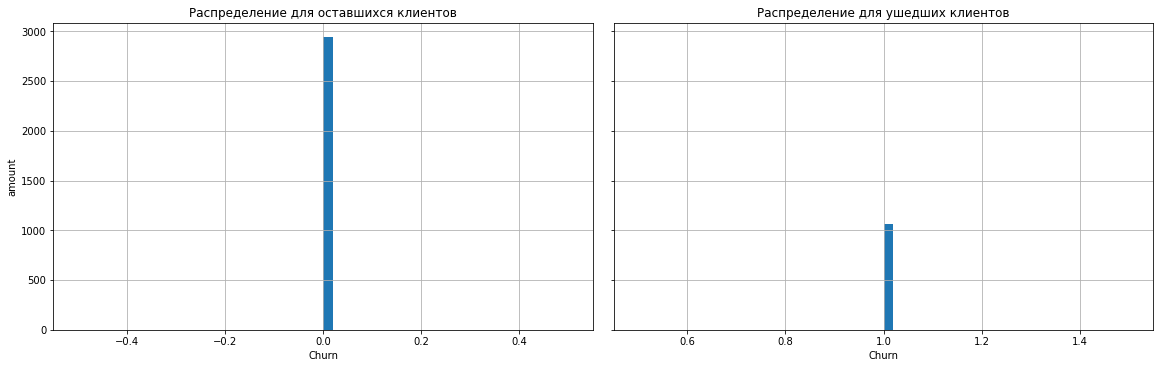

<Figure size 1152x360 with 0 Axes>

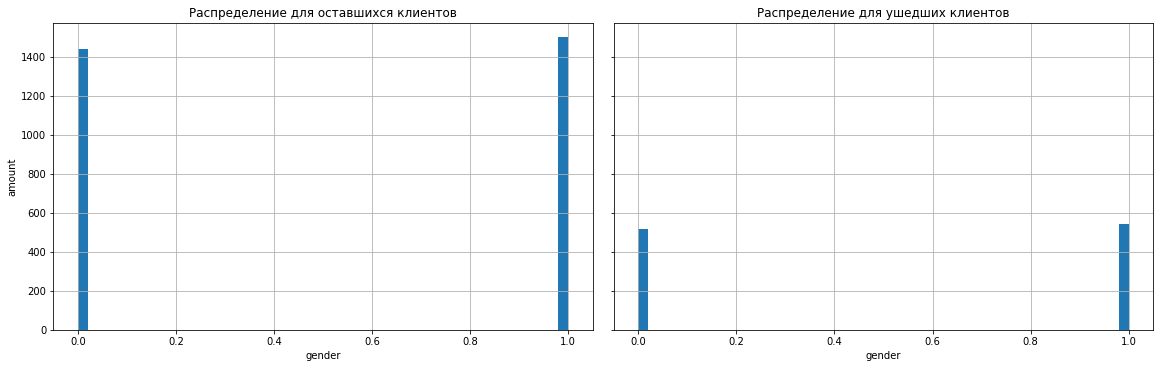

<Figure size 1152x360 with 0 Axes>

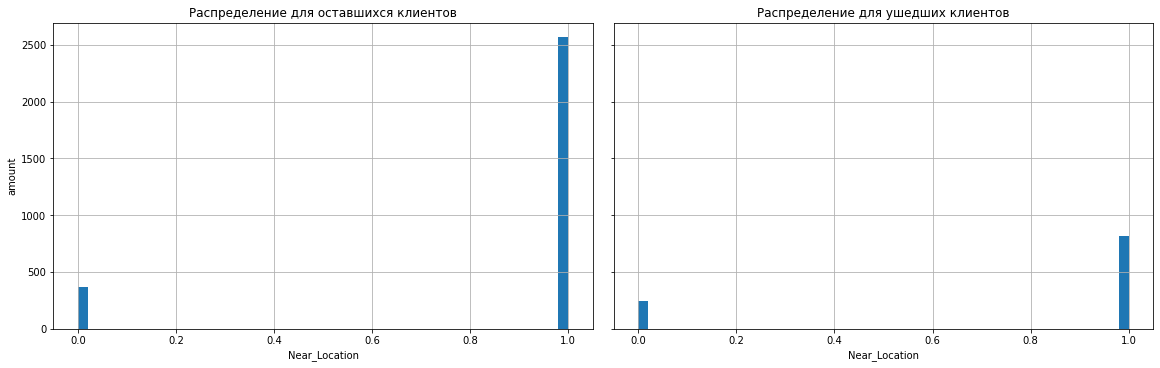

<Figure size 1152x360 with 0 Axes>

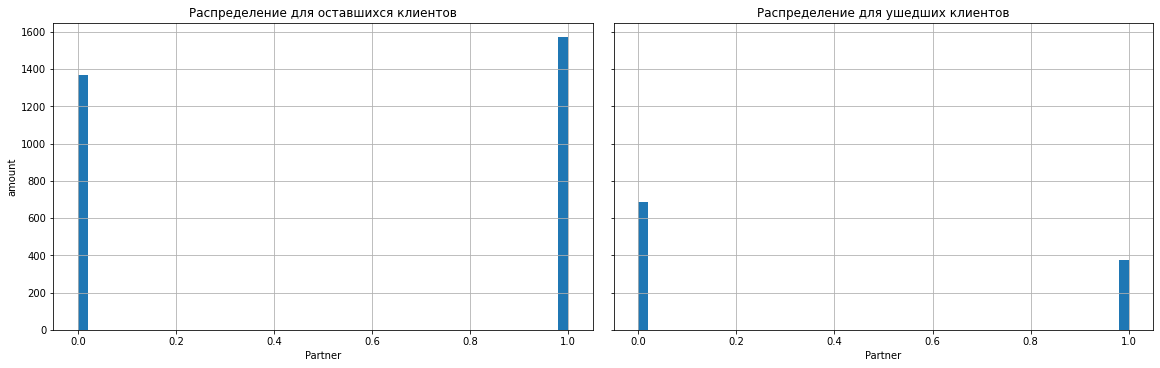

<Figure size 1152x360 with 0 Axes>

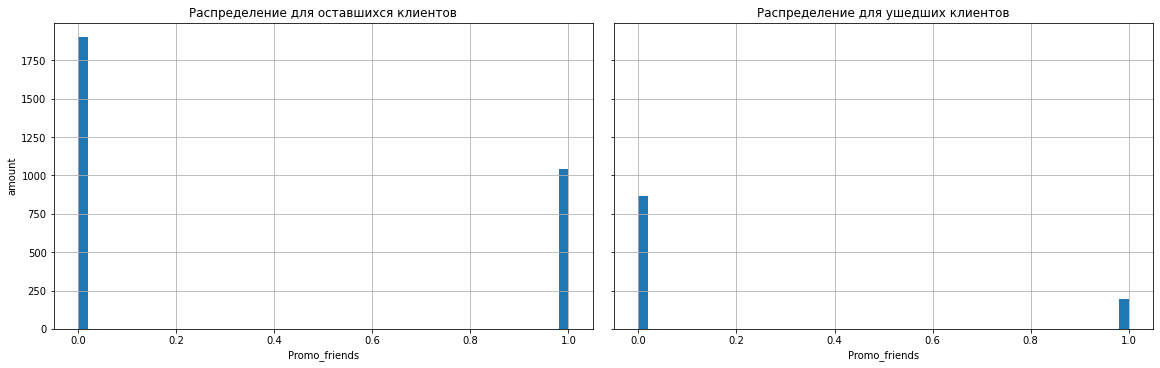

<Figure size 1152x360 with 0 Axes>

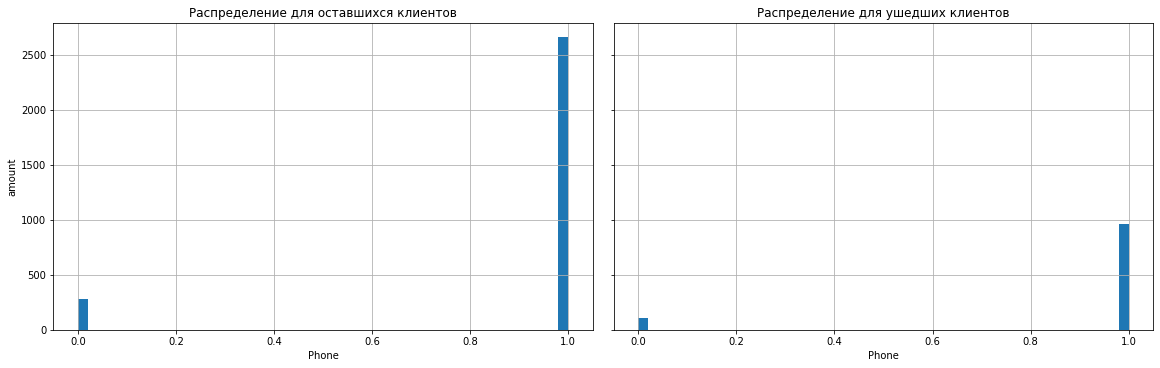

<Figure size 1152x360 with 0 Axes>

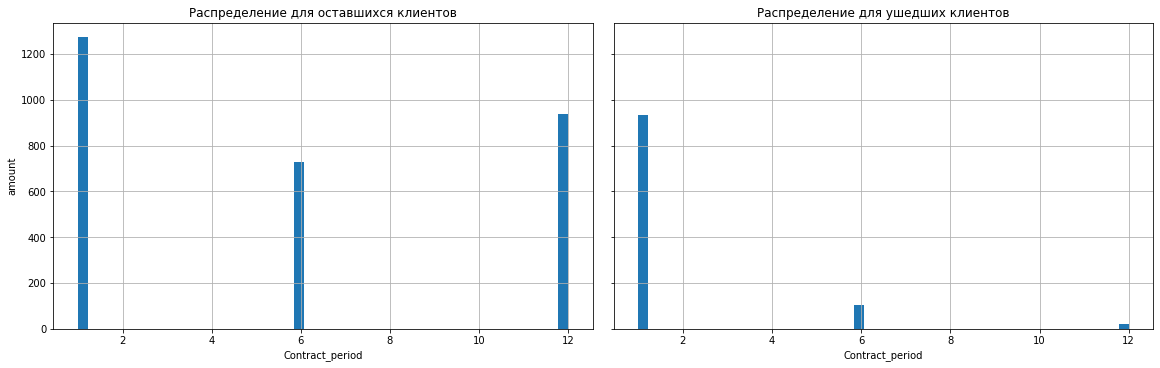

<Figure size 1152x360 with 0 Axes>

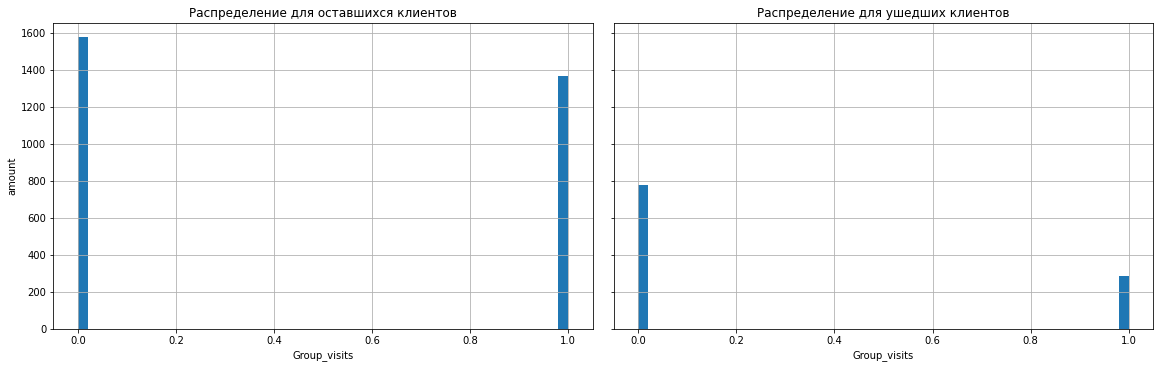

<Figure size 1152x360 with 0 Axes>

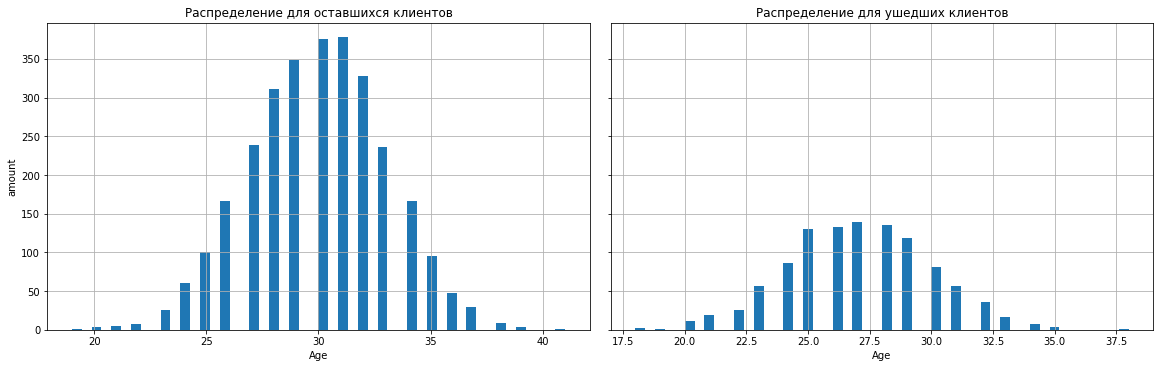

<Figure size 1152x360 with 0 Axes>

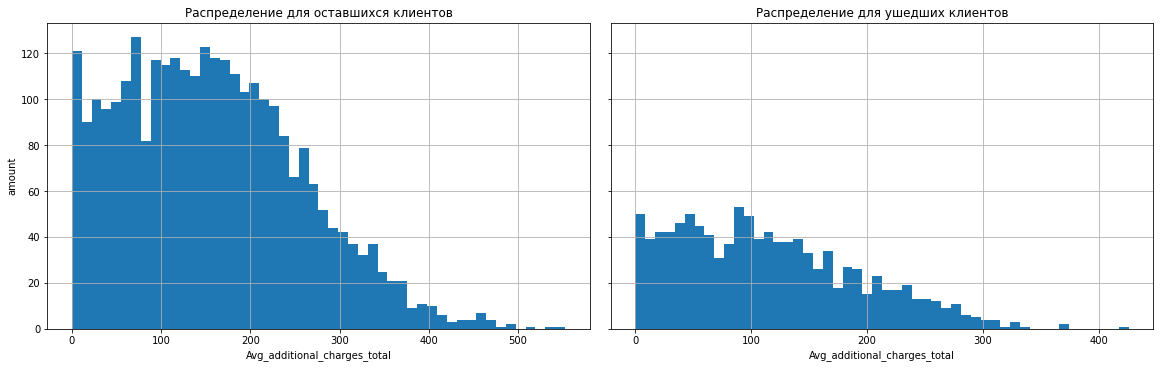

<Figure size 1152x360 with 0 Axes>

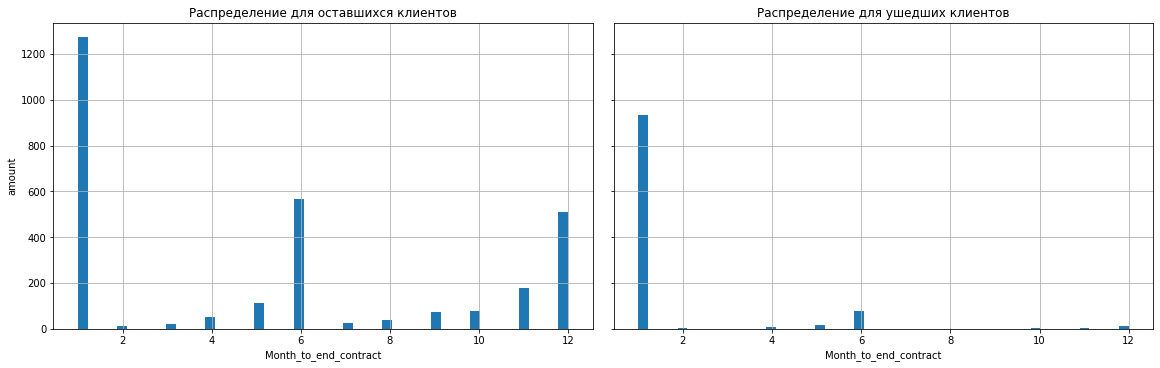

<Figure size 1152x360 with 0 Axes>

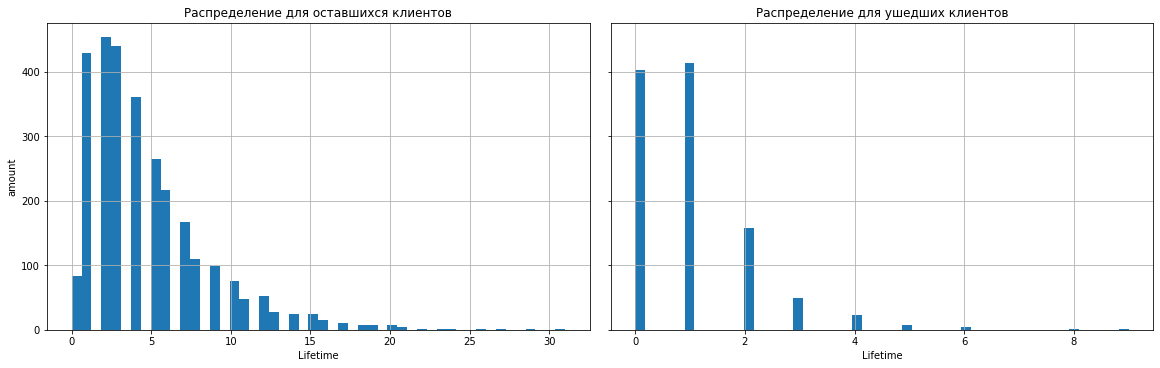

<Figure size 1152x360 with 0 Axes>

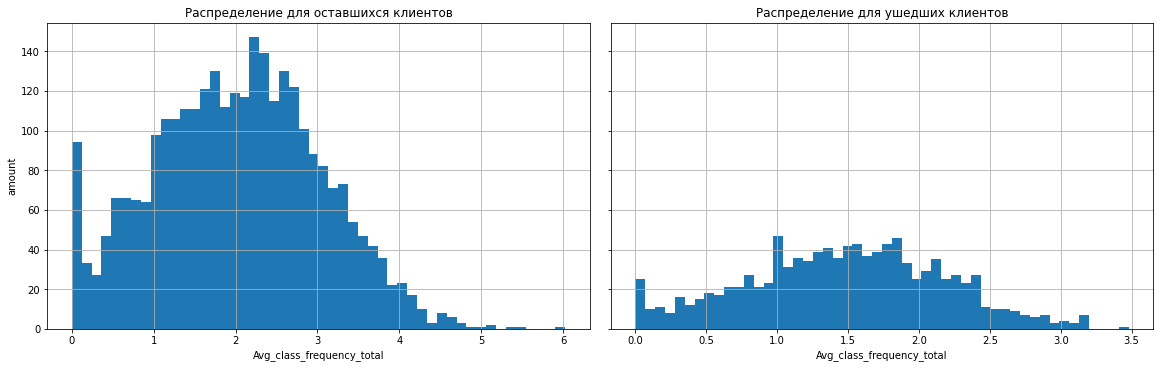

<Figure size 1152x360 with 0 Axes>

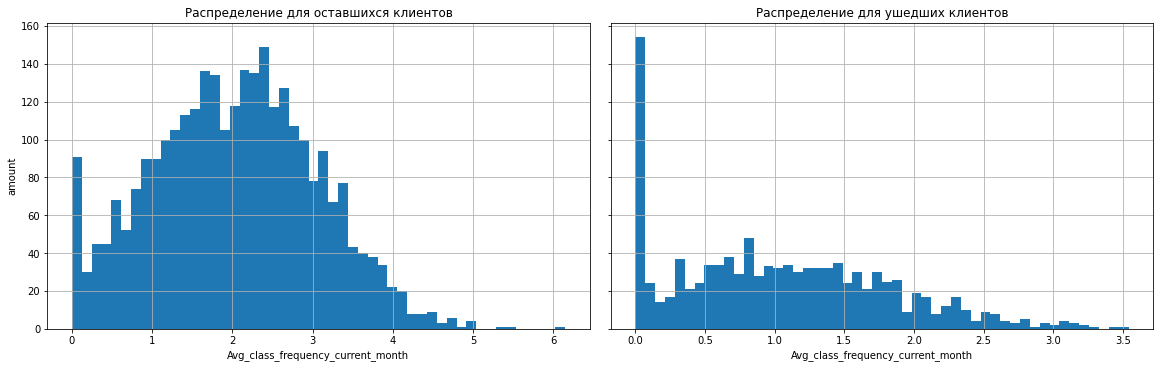

In [9]:
# визуализация распределения значений в column
def column_visible(df, column, bins, suptitle, xlabel, ylabel):

    plt.figure(figsize=(16,5)) # размер фигуры
    plt.suptitle(suptitle + ' [' + column + ']', fontsize=16) # название фигуры
    
    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, sharey=True, figsize=(16, 5))

    # первая фигура hist()
    ax1.hist(df.query('Churn==0')[column], bins=bins)
    ax1.set_xlabel(xlabel) # название оси x
    ax1.set_ylabel(ylabel) # название оси y
    ax1.set_title('Распределение для оставшихся клиентов')
    ax1.grid(axis = 'both') # отображение сетки
    
    # вторая фигура 
    #plt.subplot(1, 2, 2) # выделим место в фигуре
    ax2.hist(df.query('Churn==1')[column], bins=bins)
    ax2.set_title('Распределение для ушедших клиентов')
    ax2.set_xlabel(xlabel) # название оси x
    
    ax2.grid(axis = 'both') # отображение сетки

    # вывод фигуры
    plt.show()

# в цикле создадим гистограммы для каждого из параметров
for i in list_signs:
    column_visible(data, i, 50, 'Распределение по столбцу', i, 'amount')

<a id='section6'></a>
### 2.4. Матрица корреляций

In [10]:
# Построим матрицу корреляций
data_cor = data.corr()
data_cor

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


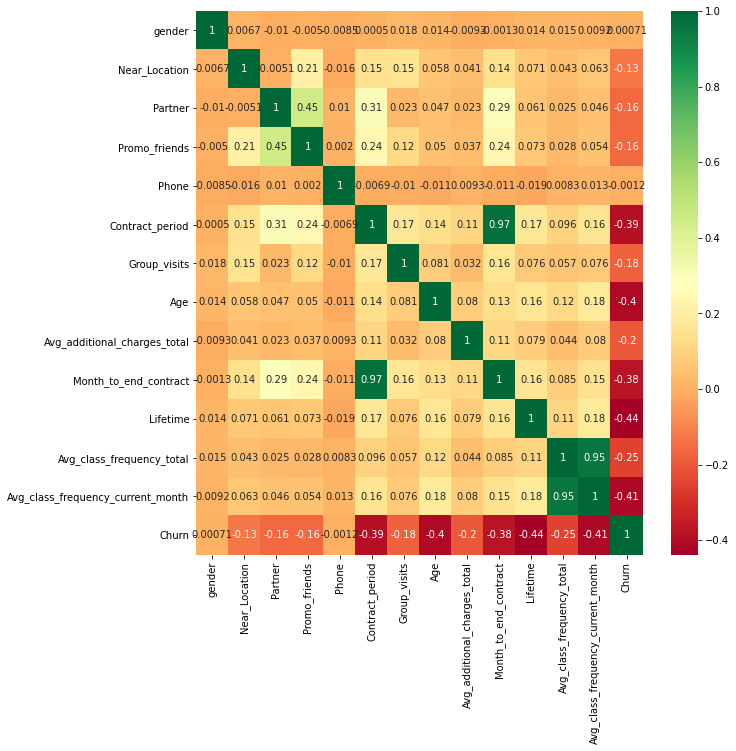

In [11]:
# выведем heatmap для отображения матрицы корреляций
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_cor, cmap='RdYlGn', annot=True);

На основе корреляции мы видим, что такие признаки как пол и наличие контактного телефона почти не влияют на конечный показатель оттока. Все остальные показатели имеют обратное влияние: слабое, либо чуть более сильное. Явно влияющих признаков, сильно связанных с результирующим показателем, предварительный анализ не выделил.

<a id='section7'></a>
## 3. Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

In [12]:
# разделите данные на признаки (матрица X) и целевую переменную (y)
X = data.drop('Churn', axis = 1)
y = data['Churn']

# Разобьем данные на обучающую и валидационную выборку функцией train_test_split()
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=0)

Обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом.

У нас есть достаточно сильная корреляция между парой признаков: 'contract_period' и 'month_to_end_contract'; 'avg_class_frequency_total' и 'avg_class_frequency_current_month, поэтому добавим параметр solver='liblinear', по дефолту применится регуляризация l2.

In [13]:
# задаем алгортм логистической регрессии для нашей модели
model = LogisticRegression(solver='liblinear', random_state=0) 
# обучаем модель
model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test)

In [14]:
# задаем алгортм случайного леса для нашей модели
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)
 
# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)
 
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st) # Ваш код здесь

Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели и определим, какая модель показала себя лучше на основании метрик.

In [15]:
# выведем метрики классификации для алгоритма логистической регресии
print('Метрики для логистической регрессии')
print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('\tPrecision: {:.2f}'.format(precision_score(y_test, predictions)))
print('\tRecall: {:.2f}'.format(recall_score(y_test, predictions)))
    

Метрики для логистической регрессии
	Accuracy: 0.93
	Precision: 0.86
	Recall: 0.83


In [16]:
# выведем метрики классификации для алгоритма случайного леса
print('Метрики для случайного леса')
print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('\tPrecision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('\tRecall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Метрики для случайного леса
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


Все значения метрик для алгоритма логистической регрессии выше, т.е. видим, что эта модель показала себя лучше.

<a id='section8'></a>
## 4. Кластеризация клиентов

Проведем кластеризацию объектов (клиентов):

<a id='section9'></a>
### 4.1. Стандартизация

In [17]:
data_new = data.drop(['Churn'], axis = 1) # удалим столбец Churn
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
x_sc = scaler.fit_transform(data_new) # обучаем нормализатор и преобразуем набор данных

print(x_sc[:10]) 

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  0.28989014
   1.19403206 -0.0565538  -1.37753121  0.16160501 -0.19332863 -1.91191971
  -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.60882159
   1.19403206  0.55732732 -0.35021325  1.83194105  0.87368001  0.04517569
   0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.8092194
  -0.83749845 -0.36349436 -0.1815923  -0.79287273 -0.46008079 -0.02049263
  -0.02901851]
 [-1.0207145   0.42788074  1.02686062  1.49716101  0.32681319  1.60882159
   1.19403206  1.17120844 -0.87472237  1.83194105 -0.46008079  1.36465509
   1.51045005]
 [ 0.97970588  0.42788074  1.02686062  1.49716101  0.32681319 -0.8092194
  -0.83749845 -0.97737548  0.5336998  -0.79287273 -0.19332863 -0.78707638
  -0.61454183]
 [ 0.97970588  0.42788074 -0.973842   -0.66793083  0.32681319 -0.8092194
   1.19403206  1.478149    3.15330097 -0.79287273 -0.19332863  0.76580519
   0.82634551]
 [ 0.97970588  0.42788074

<a id='section10'></a>
### 4.2. Матрица расстояний

In [18]:
# Построим матрицу расстояний функцией linkage()
linked = linkage(x_sc, method = 'ward') 

Сохраненную в переменной linked таблицу связок между параметрами визуализируем как дендрограмму.

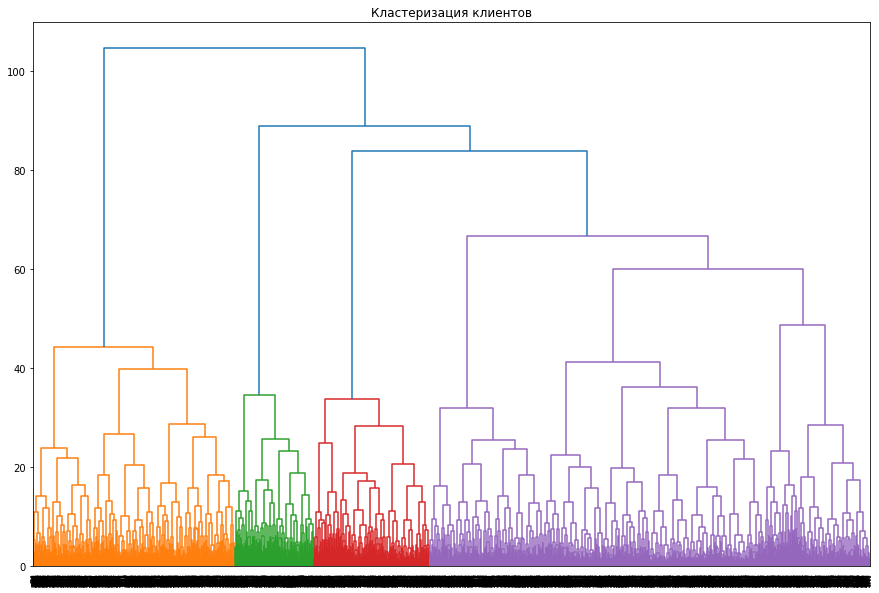

In [19]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов')
plt.show() 

Предложенное оптимальное число кластеров 4 — 4 разных цвета на графике.

<a id='section11'></a>
### 4.3. Обучение модели кластеризации. Прогноз кластеров клиентов

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. За число кластеров примем n=5.

In [20]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
cl = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = cl.fit_predict(x_sc)

<a id='section12'></a>
### 4.4. Средние значения и распределение признаков для кластеров. Доля оттока клиентов

In [21]:
# сохраняем метки кластера в поле нашего датасета
data['cluster_cl'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
data_cluster = data.groupby(['cluster_cl']).mean().reset_index()
data_cluster

,cluster_cl,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Глядя на эту матрицу, сложно заметить что-то. Для большей наглядности построим графики распределения признаков для кластеров.

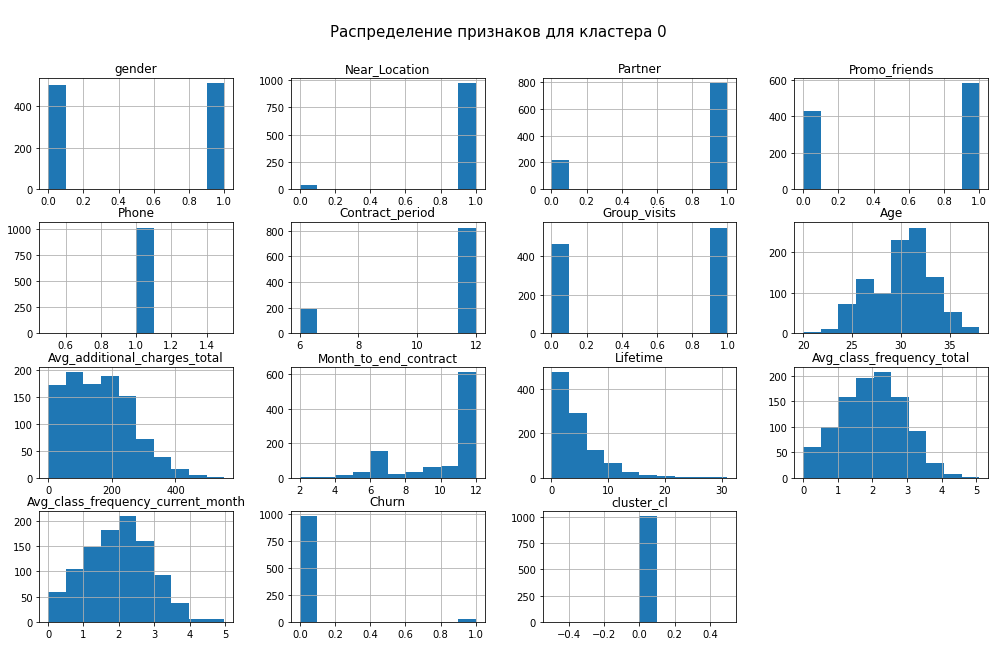

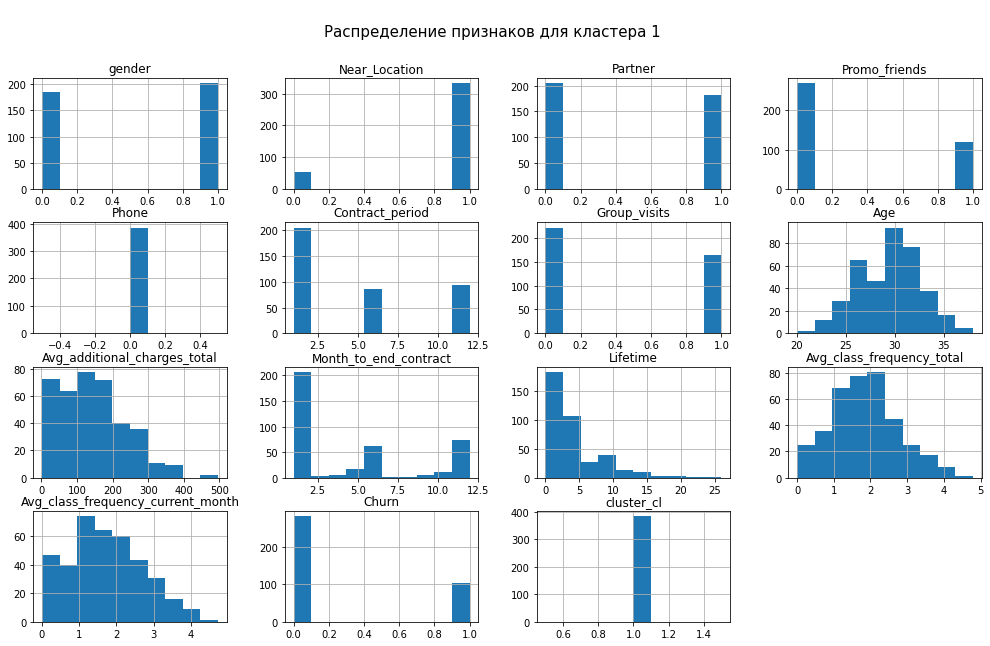

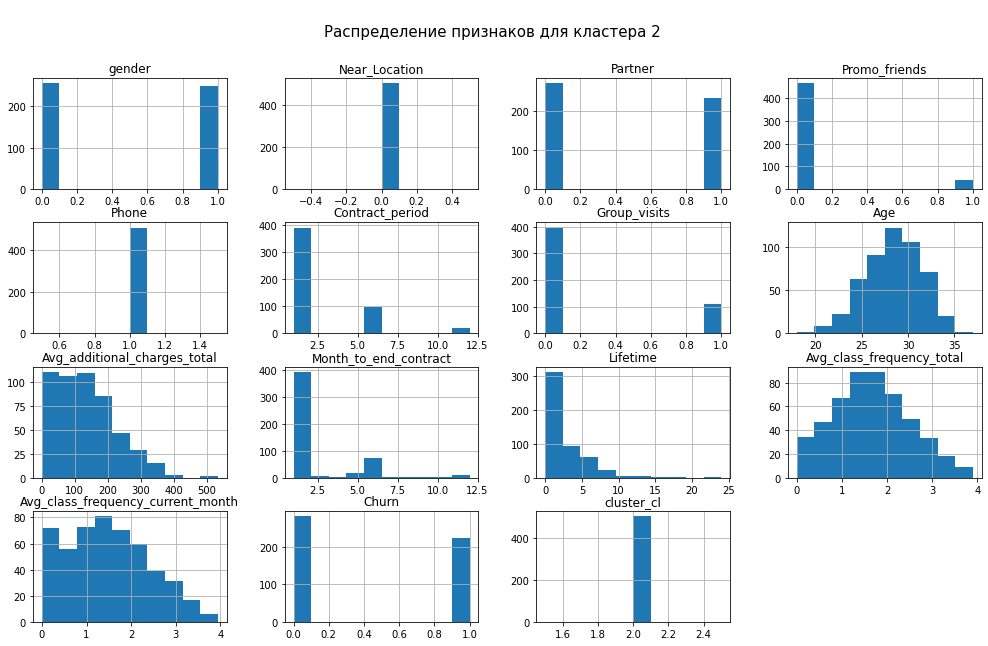

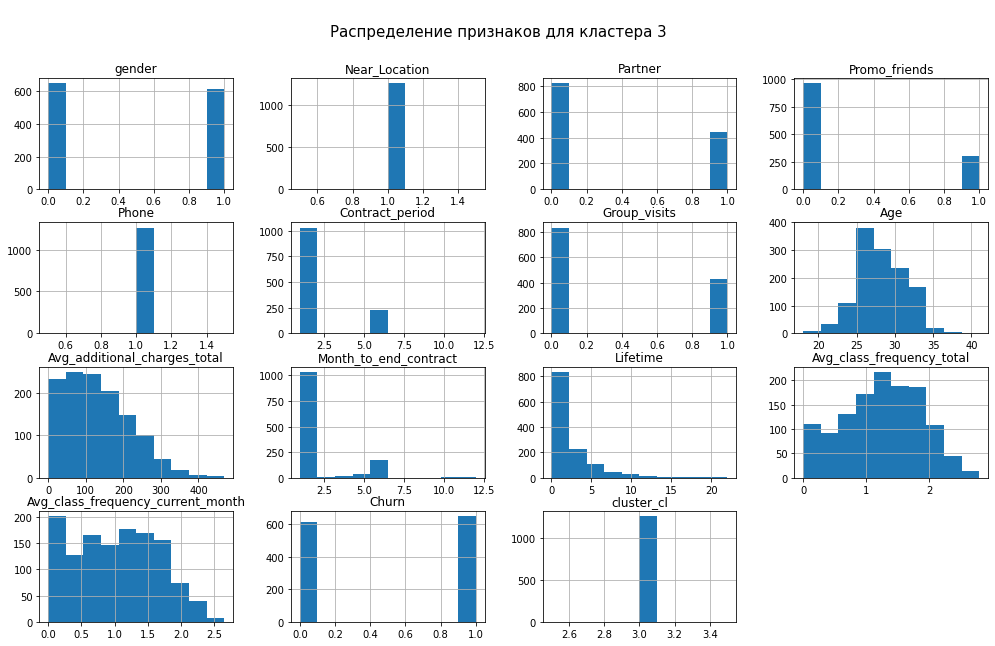

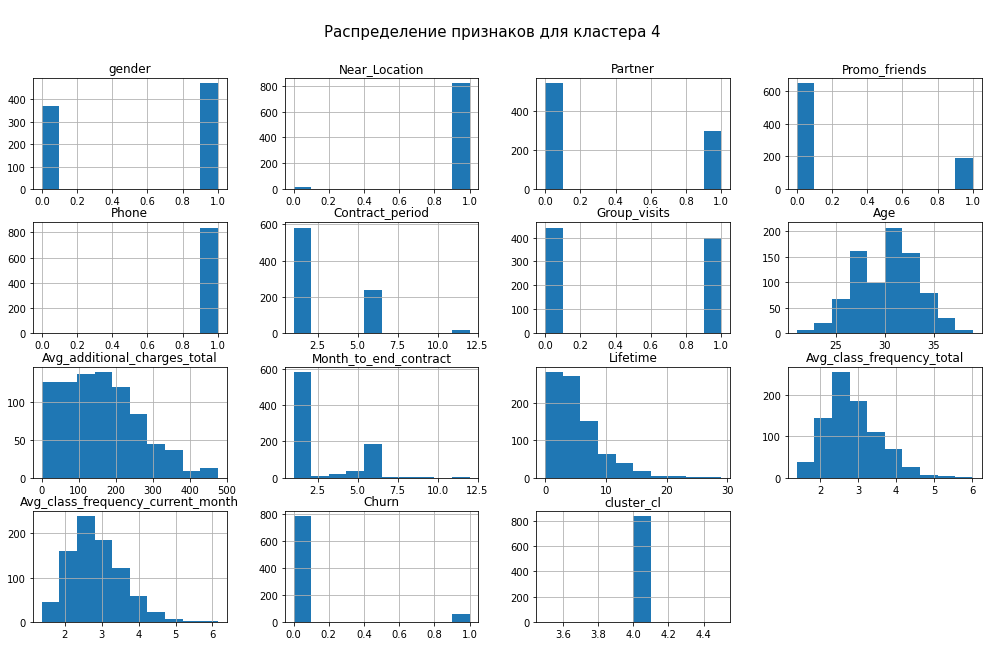

In [22]:
for value in [0, 1, 2, 3, 4]:
  data[data['cluster_cl']==value].hist(figsize=(17,10))
  plt.suptitle('\nРаспределение признаков для кластера {}'.format(value), fontsize = 15)
  plt.show()

Теперь стало проще дать описание кластеров, но посмотрим внимательнее еще на долю оттока клиентов.




In [23]:
data_cluster['Churn']

0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: Churn, dtype: float64

Кластеры отличаются по доле оттока, наиболее склонны к оттоку кластер 2 и кластер 3. Дадим более подробное описание фичей наших кластеров:

**Кластер 0**

Отток - 3% 

Живут или работают далеко от фитнес-центра

В основном обладатели самых долгосрочных абонементов - на 11 месяцев в среднем

Возрастная группа клиентов - 30 лет в среднем

Лайфтайм посещенийй в среднем 5 месяцев

Количество посещений в неделю в среднем равно 2 

Преобладают сотрудники компаний-партнеров - 78%

**Кластер 1**

Отток - 27%

Живут или работают недалеко от фитнес-центра

Посещают клуб - примерно 2 раз в неделю

Договора на  срок в среднем 5 месяцев

Средний возраст клиентов 29 лет

**Кластер 2**

Отток - 44%

Живут или работают далеко от фитнес-центра

Заключают договора на  короткий срок - 2 месяца

Возрастная группа - 28 лет в среднем

Лайфтайм - почти 3 месяц
Посещают клуб реже чем 2 раза в неделю

**Кластер 3**

Отток - 51%

Живут или работают недалеко от фитнес-центра

Низкий % - 35% и 24% пришедших от партнеров и по промо акции

Период догоовра - почти 2 месяца

Лайфтайм  2,4 месяцев

Частота посещения самая низкая - 1 раз в неделю


**Кластер 4**

Отток - 7%

Живут или работают недалеко от фитнес-центра

Как и для кластера 3 мало кто из этих клиентов пришли от партнеров и по промо акции (36% и 23%)

В среднем 2,7 месяцев контракты

Лайфтайм - 5 месяцев

Посещают зал в среднем почти 3 раза в неделю


<a id='section13'></a>
## 5. Выводы

Мы построили пронозную модель с неплохой точностью. Теперь мы можем прогнозировать вероятность оттока по каждому клиенту. Явных зависимостей факта оттока от одного конкретного признака из рассматриваемых не обнаружено. Но на основе проведенного анализа можно сделать следующие выводы: Средняя по оттоку клиентов близка к 0,3, а медиана равна 0. Соответственно, около трети клиентов фитнес-центра уходит в отток.

Средняя по полу клинтов близка к 0,5, а медиана равна 1. Соответственно, услугами фитнес-центра пользуются в равной степени мужчины и женщины.

Средняя по близости к фитнес-центру близка к 0,85, а первый квартиль равен 1. Распределения по признаку не сильно отличаются. Среднее значение для лояльных клиентов чуть выше, чем для людей, уходящих в отток. Таким образом, фитнес-центр посещает больше клиентов, которые живут поблизости. При этом немного лояльнее к фитнес-центру те, кто живёт поблизости, чем те, кто живёт в отдалении.

Средняя по принадлежности к компании-партнёру близка к 0,5. Распределения для ушедших в отток и оставшихся клиентов ведут себя по-разному. Так, в фитнес-центре в равной степени представлены клиенты, являющиеся сотрудниками компаний-партнёров, и люди, не имеющие к ним отношение. Но ушедшие в отток клиенты в большей степени не являются сотрудниками компаний-партнёров.

Средняя по пришедшим по промо-акции "Приведи друга" равна 0,3, медиана равна 0. Распределения для ушедших в отток и лояльных клиентов близки, но средние значения немного отличаются (для второй группы значение выше). Соответственно, большинство клиентов фитнес-центра не пришло по промо-акции "Приведи друга", но среди лояльных клиентов воспользовавшихся акцией больше, чем среди уходящих в отток.

Средняя по наличию контактного телефона близка к 0,9, а четвёртый квартиль равен 1. Распределения по лояльным и нелояльным клиентам имеют схожий вид. Тамим образом, практически все клиенты фитнес-центра оставляют контакты для связи - вне зависимости от того, останутся они в фитнес-центре, или уйдут в отток.

Минимальное значение возраста равно 18, максимальное - 41, среднее - 29. Среднее значение близко к медиане, стандартное отклонение очень низкое, распределение для лояльных и нелояльных клиентов нормальное. Распределение для лояльных клиентов немного смещено вправо со средней в 30, а для ушедших клиентов - влево со средней в 27. Соответственно, услугами фитнес-центра пользуются клиенты возрастом от 18 до 41 года (со средним возрастом около 29 лет). Причём в отток в дальнейшем уходят клиенты более молодого возраста (около 27 лет).

Минимальное значение времени с первого обращения равно 0, максимальное - 31, среднее - 3, медиана близка к 4 месяцам. Распределение времени с момента первого обращения для обоих групп (лояльных и нелояльных) похоже на распределение Пуассона. Но для ушедших в отток клиентов оно сильно смещено влево (со средним в 1 месяц), практически не имея значения в более высоких значениях, а для лояльных клиентов принимает более высокие значения (со средним в 5 месяцев). Таким образом, в фитнес центре есть "новенькие" клиенты (которые несколько месяцев пользуются услугами центра) и "опытные" клиенты (которые достаточно давно начали посещать фитнес-центр). При этом клиенты, проявляющие уже в первые несколько месяцев лояльность к фитнес-центру, скорее всего, не уйдут в отток в последующие месяцы.

Показатель длительности абонемента может принимать значения 1, 6 и 12 месяцев. Среднее значение равно 4-5 месяцев. При этом есть перекос в данных: медиана равна 1 месяцу. Среднее значение для лояльных пользователей - 5-6 месяцев, для уходящих в отток - 1-2 месяца. Показатель времени до окончания абонемента принимает значения от 1 до 12 месяцев. Среднее значение равно 4 месяца, При этом есть перекос в данных: медиана равна 1 месяцу. Различия в распределении групп (лояльных и нелояльных клиентов) по сроку до окончания действующего абонемента такие же, как и в распределениях по длительности абонемента. Соответственно, клиенты предпочитают покупать абонемент на короткий срок, но купившие более длительный абонемент с большей неохотой уйдут в отток, чем те, у кого он действует короткий срок.

Средняя по посещаемости групповых занятий близка к 0,4, а медиана равна 0. Распределения по лояльным и уходящим в отток клиентам различаются. Так, среди клиентов фитнес-центра больше тех, кто не интересуется групповыми занятиями (около 60%). При этом уходящие в отток клиенты практически не заинтересованы в таких занятиях.

Средняя частота посещений за всё время с начала действия абонемента и за предыдущий месяц колеблются в промежутке от 0 до 6 раз в неделю. Среднее значение и медиана практически равны, стандартное отклонение невысоко. Распределение для лояльных и нелояльных групп является нормальным. Для лояльной группы оно немного смещено влево (среднее 1-2), а для группы уходящих в отток имеется сильное смещение влево (среднее около 2). Соответственно, в фитнес-центре есть люди, которые купили абонемент, но ни разу не посетили центр, а есть и очень "приверженные" клиенты (посещение 6 раз в неделю). При этом, в среднем, все клиенты посещают центр около 1-2 раз в неделю. Однако, среди лояльных клиентов много тех, кто часто посещает фитнес-центр.

Выручка с клиента от прочих услуг фитнес-центра сильно колеблется от 0,15 до 552,6 ден.ед. Среднее значение равно 147 ден.ед, а медиана - 136 ден.ед. Между группами (лояльные и нелояльные клиенты) различие в среднем значении составляет 43 ден.ед. (для лояльных значение выше). Распределение средней выручки от других услуг фитнес-центра для обоих датасетов смещено влево с большим смещением для ушедших людей. Таким образом, затраты на прочие услуги фитнес-центра очень сильно варьируются для клиентов. При этом уходящие в отток клиенты склонны экономить, а среди лояльных клиентов встречаются те, кто готов заплатить очень высокую цену.

<div class="alert alert-block alert-info">
    
Таким образом, можно дать следующие **рекомендации для отдела маркетинга**:

1) Привлекать в большей степени клиентов из близлежащих районов - размещать в лифтах и почтовых ящиках близлежащих многоэтажных домов листовки с промоинформацией о фитнес-центре;

2) Ввести какие-то бонусы при продлении абонемента, т.к. среди ушедших в отток клиентов много тех у кого абонемент на 1, 2 месяца, например, первые 3 продления со скидкой 20%;

3) Для клиентов, которые занимаются 1 раз в неделю и реже придумать бонус, мотивирующий заниматься чаще и оставаться в фитнес-центре, т.к. эта категория клиентов чаще уходит в отток, например, в абонементе на 12 занятий стоимость 1 занятия будет ниже на 20%, чем в абонементе на 8 заянятий т.е. - чем чаще человек будет заниматься, тем дешевле будет обходиться 1 занятие.
    </div>